#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [17]:
for i in range(0, 15):
    x = np.random.randint(0, 37)
    
    if x == 0:
        print("zero")
    else:
        print(f'{x}')

1
34
26
34
20
10
36
20
8
2
31
22
17
11
28


#### 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.
#### 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9.и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

In [18]:
#2.1
k,m = 0, 0
n = 100
for i in range(0, n):
    x = np.random.uniform(0, 10)
    if x<5:
#        print("Орел")
        k = k + 1
    else:
#        print("Решка")
        m = m + 1
print(k,m, 1 == k/n + m /n)

46 54 True


Text(0.5, 1.0, 'Histogram')

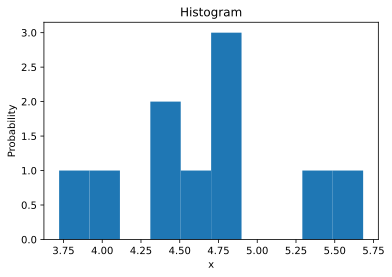

In [19]:
# 2.2
x = [np.sum(np.random.rand(10)) for v in range(10) ]
num_bins = 10
n, bins, patches = plt.hist(x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')

##### 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.
##### 3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [20]:
# 3.1
def combinations(k, n):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

def bernulli(k, n, p):
    return combinations(k, n) * p**k * (1 - p)**(n-k)

def arrangements(k, n):
    return int(factorial(n) / factorial(n - k))

def permutations(n):
    return int(factorial(n))

In [29]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)


3760 10000 0.376


In [30]:
# формула Бернулли (биномиальное распределение)
p = bernulli(2, 4, 0.5)

print(f'вероятность выпадения 1-го удачного исходов из 4-х по формуле Бернулли = {p}\nи совпадает с предыдущим результатом')

вероятность выпадения 1-го удачного исходов из 4-х по формуле Бернулли = 0.375
и совпадает с предыдущим результатом


In [33]:
#3.2
print(f'\t  2 успеха из  9 = {round(bernulli(2,   9, 0.5), 3)}')
print(f'\t  3 успеха из  8 = {round(bernulli(3,  8, 0.5), 3)}')
print(f'\t 5 успехов из 20 = {round(bernulli(5, 20, 0.5), 3)}')

	  2 успеха из  9 = 0.07
	  3 успеха из  8 = 0.219
	 5 успехов из 20 = 0.015


##### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [43]:
print(f'Сочетания  3-х  элементов из 6-ти  = {combinations(3, 6)}')
print(f'Сочетания 12-ти элементов из 18-ти = {combinations(12, 18)}')
print()

print(f'Размещения  3-х элементов из 9-ти = {arrangements(3, 9)}')
print(f'Размещения  3-х элементов из 7-ми = {arrangements(3, 7)}')
print()

print(f'Перестановка 9-ти элементов = {permutations(9)}')
print(f'Перестановка 6-ти элементов = {permutations(6)}')

Сочетания  3-х  элементов из 6-ти  = 20
Сочетания 12-ти элементов из 18-ти = 18564

Размещения  3-х элементов из 9-ти = 504
Размещения  3-х элементов из 7-ми = 210

Перестановка 9-ти элементов = 362880
Перестановка 6-ти элементов = 720


##### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

0.674095398244459 0.1514564417798723
0.6740953982444597 0.15145644177987191


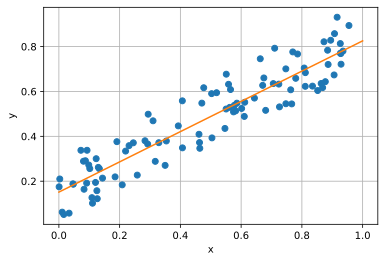

In [34]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [38]:
# коэффициент корреляцииv "из коробки"
c = np.corrcoef(x, y) 
c

array([[1.        , 0.92877265],
       [0.92877265, 1.        ]])

In [39]:
# коэффициент корреляции
coef_corr = np.sum( (x - x.mean())*(y - y.mean()) ) / np.sqrt(np.sum( (x - x.mean())**2) * np.sum((y - y.mean())**2) )
print(f'коэффициент корреляции = {round(coef_corr, 10)}')

коэффициент корреляции = 0.9287726539
